# Vamos a utilizar un dataset de perros y gatos para explorar técnicas de Data Augmentation

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [2]:
import tensorflow as tf
from tensorflow import keras

### DATASET:

El Dataset contiene 4000 imágenes de gatos y perros (2000 gatos y 2000 perros). Vamos a usar 2000 imágenes para entrenar, 1000 para validación, 1000 para test.

In [3]:
train_dir = r'C:\Users\Agustin\Documents\VpC2_Datasets\Clase2\perros_y_gatos\train'
validation_dir = r'C:\Users\Agustin\Documents\VpC2_Datasets\Clase2\perros_y_gatos\validation'
test_dir = r'C:\Users\Agustin\Documents\VpC2_Datasets\Clase2\perros_y_gatos\test'

### Preprocesamiento de los datos

* Leer las imágenes
* Decodificar los JPEG en imágenes de píxeles RGB
* Convertir estas imágenes en tensores de valores en punto flotante
* Reescalar los valores de los píxeles al intervalo [0,1]


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Link : https://keras.io/preprocessing/image/

In [5]:
# Así generamos batches desde los directorios de imágenes
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [7]:
model = models.Sequential()

#### COMPLETAR #####
# agregar las siguientes capas:
# convolucional f=(3,3), # de filtros: 32, activación relu
# max pooling f=2, s=2
# convolucional f=(3,3), # de filtros: 64, activación relu
# max pooling f=2, s=2
# convolucional f=(3,3), # de filtros: 128, activación relu
# max pooling f=2, s=2
# convolucional f=(3,3), # de filtros: 128, activación relu
# max pooling f=2, s=2
# capa flatten
# capa densa de 512 elementos activación relu
# capa densa con un output de 1 elemento con activación sigmoidea
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))



In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [9]:
from tensorflow.keras import optimizers

# compilar el modelo con binary_crossentropy y optimizador RMSprop con
# learning rate 1e-4, la métrica a usar es la accuracy (acc)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [10]:
# utilizar model.fit_generator para entrenar
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
100/100 [==============================] - 31s 311ms/step - loss: 0.6892 - acc: 0.5325 - val_loss: 0.6728 - val_acc: 0.6250
Epoch 2/5
100/100 [==============================] - 32s 321ms/step - loss: 0.6629 - acc: 0.5955 - val_loss: 0.6661 - val_acc: 0.5830
Epoch 3/5
100/100 [==============================] - 33s 326ms/step - loss: 0.6179 - acc: 0.6600 - val_loss: 0.6200 - val_acc: 0.6570
Epoch 4/5
100/100 [==============================] - 32s 320ms/step - loss: 0.5686 - acc: 0.7000 - val_loss: 0.6353 - val_acc: 0.6340
Epoch 5/5
100/100 [==============================] - 30s 298ms/step - loss: 0.5443 - acc: 0.7195 - val_loss: 0.5771 - val_acc: 0.6920


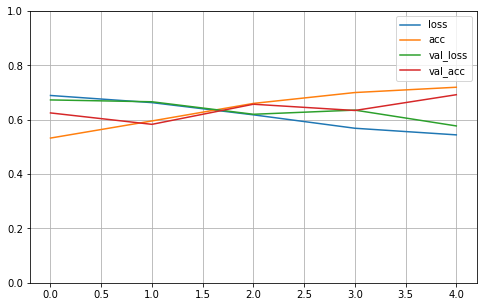

In [11]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [12]:
ev = model.evaluate(test_generator)

50/50 [==============================] - 4s 88ms/step - loss: 0.5776 - acc: 0.6970


In [13]:
from tensorflow.keras import backend as K 

#K.clear_session()
#del model

### DATA AUGMENTATION

Distorsión, Rotación, Crop, Flip horizontal: 
![image.png](attachment:image.png)

Vamos a distorsionar (estirando y escalando), rotar las imágenes, invertirlas horizontalmente, hacer zoom en una región, esto va a ser aleatorio dentro de un cierto rango, utilizar ImageDataGenerator con parámetros para que esto ocurra.

https://keras.io/api/preprocessing/image/

https://github.com/keras-team/keras-preprocessing/blob/master/keras_preprocessing/image/image_data_generator.py

https://github.com/keras-team/keras-preprocessing/blob/master/keras_preprocessing/image/affine_transformations.py

usar:

- rotation_range -> rango aleatorio de angulo de rotacions
- width_shift_range -> rango aleatorio de desplazamiento en x expresado como proporcion de la imagen [0,1]
- height_shift_range -> rango aleatorio de desplazamiento en y expresado como proporcion de la imagen [0,1]
- shear_range -> rango aleatorio de 'shear' o cillamiento https://en.wikipedia.org/wiki/Shear_mapping [0,1]
- zoom_range -> rango aleatorio de zoom de la imagen [0,1]
- horizontal_flip -> boolean (si se flipea aleatoriamente la imagen en la dirección horizontal)

In [14]:
# Así generamos batches desde los directorios de imágenes
train_datagen_aug = ImageDataGenerator(rescale=1./255,rotation_range=50,)
test_datagen_aug = ImageDataGenerator(rescale=1./255)
val_datagen_aug = ImageDataGenerator(rescale=1./255)

train_generator_aug = train_datagen_aug.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator_aug = val_datagen_aug.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_generator_aug = test_datagen_aug.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Veamos algunas imágenes

In [15]:
# i = 1
# for batch in train_datagen.flow(train_generator, batch_size=1,
#                           save_to_dir='.', save_prefix='img', save_format='jpeg'):
#     i += 1
#     if i > 6:
#         break

# import matplotlib.image as mpimg
# import glob
# import os

# files =glob.glob(".\*.jpeg")
# plt.figure(figsize=(10,5))
# i = 1
# for f in files:
#     if i > 6:
#         break 
#     plt.subplot(2,3,i)
#     image = mpimg.imread(f)
#     plt.imshow(image)
#     i+=1
#     os.remove(f)
    
# plt.show()

In [16]:
model_aug = models.Sequential()

#### COMPLETAR #####
### usar el mismo modelo de antes

# agregar las siguientes capas:
# convolucional f=(3,3), # de filtros: 32, activación relu
# max pooling f=2, s=2
# convolucional f=(3,3), # de filtros: 64, activación relu
# max pooling f=2, s=2
# convolucional f=(3,3), # de filtros: 128, activación relu
# max pooling f=2, s=2
# convolucional f=(3,3), # de filtros: 128, activación relu
# max pooling f=2, s=2
# capa flatten
# capa densa de 512 elementos activación relu
# capa densa con un output de 1 elemento con activación sigmoidea

model_aug.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model_aug.add(layers.MaxPooling2D((2,2)))
model_aug.add(layers.Conv2D(64, (3,3), activation='relu'))
model_aug.add(layers.MaxPooling2D((2,2)))
model_aug.add(layers.Conv2D(128, (3,3), activation='relu'))
model_aug.add(layers.MaxPooling2D((2,2)))
model_aug.add(layers.Conv2D(128, (3,3), activation='relu'))
model_aug.add(layers.MaxPooling2D((2,2)))
model_aug.add(layers.Flatten())
model_aug.add(layers.Dense(512, activation='relu'))
model_aug.add(layers.Dense(1, activation='sigmoid'))

model_aug.summary()

model_aug.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [17]:
history_aug = model_aug.fit_generator(
      train_generator_aug,
      steps_per_epoch=100,
      epochs=5,
      validation_data=validation_generator_aug,
      validation_steps=50)

Epoch 1/5
100/100 [==============================] - 34s 345ms/step - loss: 0.6886 - acc: 0.5535 - val_loss: 0.6846 - val_acc: 0.5030
Epoch 2/5
100/100 [==============================] - 40s 402ms/step - loss: 0.6632 - acc: 0.6010 - val_loss: 0.6683 - val_acc: 0.5750
Epoch 3/5
100/100 [==============================] - 34s 344ms/step - loss: 0.6355 - acc: 0.6405 - val_loss: 0.6229 - val_acc: 0.6510
Epoch 4/5
100/100 [==============================] - 34s 340ms/step - loss: 0.6105 - acc: 0.6545 - val_loss: 0.6576 - val_acc: 0.6080
Epoch 5/5
100/100 [==============================] - 34s 340ms/step - loss: 0.5853 - acc: 0.6970 - val_loss: 0.6002 - val_acc: 0.6660


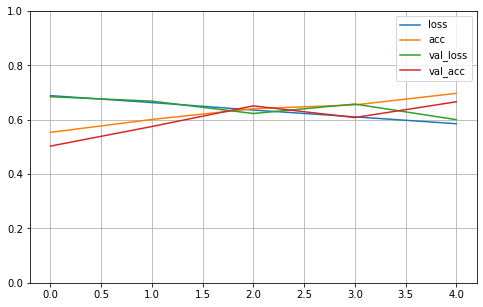

In [18]:
pd.DataFrame(history_aug.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [19]:
ev_aug = model_aug.evaluate(test_generator_aug)

50/50 [==============================] - 4s 80ms/step - loss: 0.5942 - acc: 0.6590


In [20]:
keras.backend.clear_session
del model
del model_aug